In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import warnings
import os
warnings.filterwarnings("ignore")

In [13]:
data_path = os.path.join('..','..','1_Data','Cleaned Data','data_cleaned.csv')
output_path = 'data'
df = pd.read_csv(data_path)


In [14]:
df = df.sample(1000000)

In [15]:
in_match_player_features = ['assists','boosts','damageDealt','DBNOs','headshotKills',
                           'killPlace','killPoints','kills','killStreaks','longestKill',
                           'revives','rideDistance','roadKills','swimDistance','roadKills',
                            'swimDistance','teamKills','vehicleDestroys','walkDistance',
                            'weaponsAcquired']

prediction_feature = ['winPlacePerc']

global_player_features = ['killPoints','winPoints','rankPoints']

match_features = ['groupId','matchId','matchDuration']

### Data Correlation

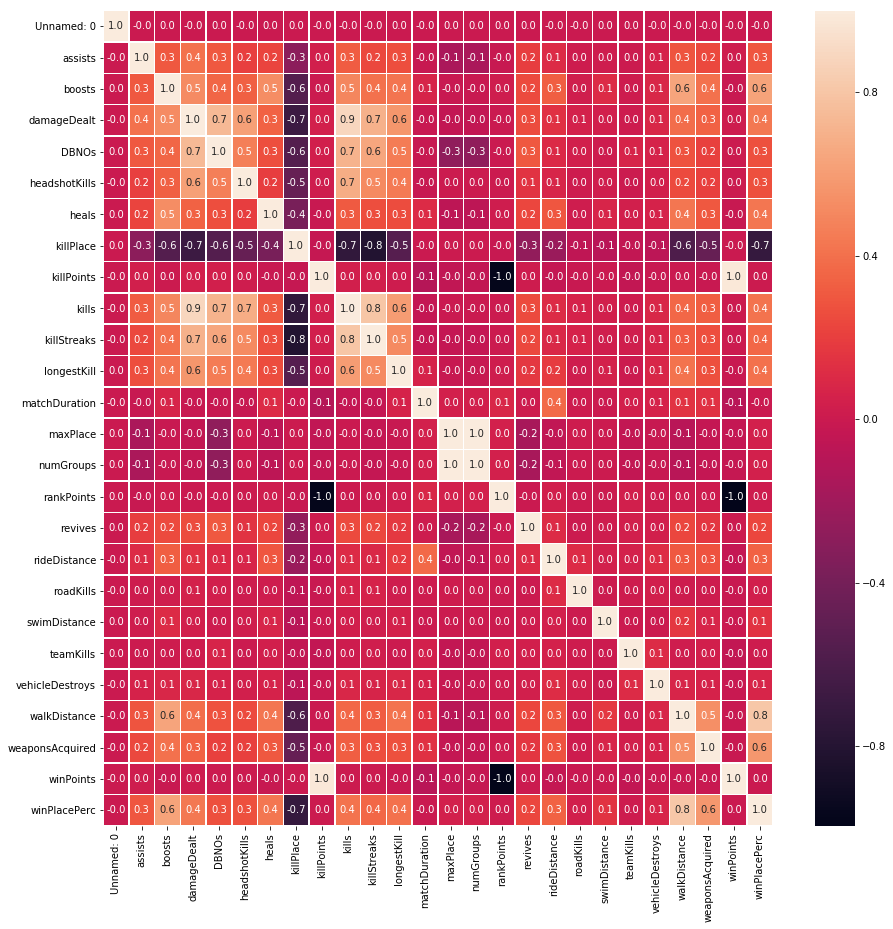

In [5]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

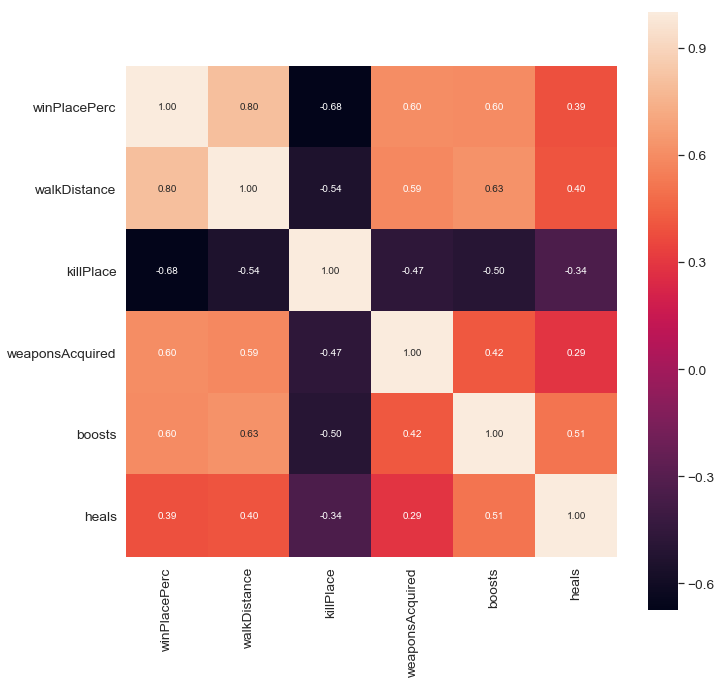

In [16]:
k = 6 #number of variables for heatmap
f,ax = plt.subplots(figsize=(11, 11))
most_cor_cols = df.corr().abs().nlargest(k, 'winPlacePerc')['winPlacePerc'].index
cm = np.corrcoef(df[most_cor_cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=most_cor_cols.values, xticklabels=most_cor_cols.values)
plt.show()

### Creating the models

In [17]:
most_cor_cols = most_cor_cols.drop(prediction_feature)

#### Linear Regression - no polynomial

In [18]:
kf = KFold(n_splits=10)

X = df[most_cor_cols] 
y = df[prediction_feature]

results_linear = {}

for k, (train, test) in enumerate(kf.split(X, y)):
    reg = LinearRegression(n_jobs=6)
#     print(X.iloc[train].head(2))
    reg.fit(X.iloc[train], y.iloc[train])
    
    y_pred = reg.predict(X.iloc[test])
    y_true =  y.iloc[test]
    rmse = mean_squared_error(y_true, y_pred)
    r2 = reg.score(X.iloc[test], y.iloc[test])
    
    results_linear['fold '+str(k)] = {'coef':reg.coef_,'rmse':rmse,'r2':r2}
    
    print("[fold {0}] coef {1} RMSE {2:.5f} R2: {3:.5f}".
          format(k,reg.coef_,rmse,r2))

[fold 0] coef [[ 0.00014526 -0.00332754  0.01700761  0.01538704  0.00030182]] RMSE 0.02119 R2: 0.74061
[fold 1] coef [[ 0.00014551 -0.00332041  0.01700717  0.01533769  0.00033504]] RMSE 0.02128 R2: 0.74013
[fold 2] coef [[ 0.0001452  -0.00333271  0.01704155  0.01529606  0.00029635]] RMSE 0.02088 R2: 0.74454
[fold 3] coef [[ 0.00014542 -0.00332683  0.01705094  0.015286    0.00027905]] RMSE 0.02112 R2: 0.74068
[fold 4] coef [[ 0.00014526 -0.00332533  0.01703724  0.01536312  0.00029919]] RMSE 0.02115 R2: 0.74262
[fold 5] coef [[ 0.00014534 -0.00332264  0.01704252  0.01534631  0.00032941]] RMSE 0.02133 R2: 0.73952
[fold 6] coef [[ 0.00014539 -0.00332303  0.01713395  0.01526129  0.00030034]] RMSE 0.02134 R2: 0.73885
[fold 7] coef [[ 0.0001455  -0.00332626  0.01705378  0.01521834  0.00027762]] RMSE 0.02142 R2: 0.73794
[fold 8] coef [[ 0.00014537 -0.00332077  0.01709628  0.01538474  0.00027647]] RMSE 0.02115 R2: 0.74107
[fold 9] coef [[ 0.00014563 -0.00331521  0.01704775  0.01539571  0.000301

#### Linear Regression - polynomial 2

In [19]:
kf = KFold(n_splits=10)

X = df[most_cor_cols] 
y = df[prediction_feature]

results_pol2 = {}

for k, (train, test) in enumerate(kf.split(X, y)):
    reg = make_pipeline(PolynomialFeatures(2), LinearRegression(n_jobs=6))
#     print(X.iloc[train].head(2))
    reg.fit(X.iloc[train], y.iloc[train])
    
    y_pred = reg.predict(X.iloc[test])
    y_true =  y.iloc[test]
    rmse = mean_squared_error(y_true, y_pred)
    r2 = reg.score(X.iloc[test], y.iloc[test])
    
    results_pol2['fold '+str(k)] = {'coef':reg.steps[1][1].coef_,'rmse':rmse,'r2':r2}
    
    print("[fold {0}] coef {1} RMSE {2:.5f} R2: {3:.5f}".
          format(k,reg.steps[1][1].coef_,rmse,r2))

[fold 0] coef [[ 0.00000000e+00  3.63067925e-04  1.10039643e-02  2.82730919e-02
   4.48147732e-02  5.61901788e-03 -3.79839420e-08 -1.80477030e-06
  -4.36164275e-06 -5.52458886e-06 -1.61645272e-06 -1.16420010e-04
  -2.88353882e-04 -2.65057439e-04 -1.04997050e-05 -2.39011710e-04
  -1.27333630e-03 -4.42626718e-04  2.75999950e-04 -4.94136121e-04
   1.20643691e-04]] RMSE 0.01695 R2: 0.79246
[fold 1] coef [[ 0.00000000e+00  3.63455524e-04  1.10134925e-02  2.86524065e-02
   4.46118190e-02  5.71001875e-03 -3.81177908e-08 -1.80548843e-06
  -4.34419447e-06 -5.48128369e-06 -1.57423012e-06 -1.16382971e-04
  -2.91737027e-04 -2.59948193e-04 -1.07773794e-05 -2.61774153e-04
  -1.28521602e-03 -4.60999265e-04  2.72432751e-04 -5.13826567e-04
   1.21455418e-04]] RMSE 0.01709 R2: 0.79126
[fold 2] coef [[ 0.00000000e+00  3.63022705e-04  1.10116877e-02  2.84048320e-02
   4.42326554e-02  5.70814011e-03 -3.79302130e-08 -1.80532464e-06
  -4.42574846e-06 -5.50606544e-06 -1.60156864e-06 -1.16537988e-04
  -2.89602

#### Linear Regression - polynomial 5

In [ ]:
kf = KFold(n_splits=10)

X = df[most_cor_cols] 
y = df[prediction_feature]

results_pol5 = {}

for k, (train, test) in enumerate(kf.split(X, y)):
    reg = make_pipeline(PolynomialFeatures(5), LinearRegression(n_jobs=6))
#     print(X.iloc[train].head(2))
    reg.fit(X.iloc[train], y.iloc[train])
    
    y_pred = reg.predict(X.iloc[test])
    y_true =  y.iloc[test]
    rmse = mean_squared_error(y_true, y_pred)
    r2 = reg.score(X.iloc[test], y.iloc[test])
    
    results_pol5['fold '+str(k)] = {'coef':reg.steps[1][1].coef_,'rmse':rmse,'r2':r2}
    
    print("[fold {0}] coef {1} RMSE {2:.5f} R2: {3:.5f}".
          format(k,reg.steps[1][1].coef_,rmse,r2))

[fold 0] coef [[-4.74313663e-08  1.22069247e-04 -5.32499727e-06  6.81372396e-07
   2.55474859e-07  1.41090591e-07 -2.70439629e-07 -9.38381641e-06
   3.45870415e-04  6.08936625e-05  3.12610163e-05 -8.93808364e-05
  -2.22388358e-06  1.43688219e-06  8.60447396e-07  2.10923271e-06
   6.46965925e-07  6.21608351e-07  3.09099461e-07  2.04460778e-07
   3.47513523e-07  2.21269365e-10  9.43755945e-10 -1.37608393e-07
  -4.29013707e-08 -8.71685399e-09  5.86757696e-07 -1.22390709e-06
   7.83083364e-07 -6.65273822e-07 -4.79198398e-05 -1.02008518e-05
  -8.56817797e-06  9.98763389e-06 -4.53642841e-06  2.00554067e-07
   1.10129463e-05 -9.86828753e-05  7.93479145e-06  7.76541824e-07
  -6.49799490e-06  1.95814849e-06  2.57997804e-06  1.36778084e-06
   1.60984405e-06 -3.97165924e-07  2.28699112e-06  5.68135216e-07
  -6.36626295e-07  6.99504444e-07  2.11980546e-07  1.19305189e-06
   4.27687941e-07  7.38632843e-08  2.81002730e-07  9.00695322e-07
  -5.02439548e-14 -1.31882909e-12  1.35602596e-11  4.89135852e

#### Linear Regression - polynomial 5

In [ ]:
kf = KFold(n_splits=10)

X = df[most_cor_cols] 
y = df[prediction_feature]

results_pol5_reg = {}

for k, (train, test) in enumerate(kf.split(X, y)):
    reg = make_pipeline(PolynomialFeatures(5), Ridge(alpha=0.01))
#     print(X.iloc[train].head(2))
    reg.fit(X.iloc[train], y.iloc[train])
    
    y_pred = reg.predict(X.iloc[test])
    y_true =  y.iloc[test]
    rmse = mean_squared_error(y_true, y_pred)
    r2 = reg.score(X.iloc[test], y.iloc[test])
    
    results_pol5_reg['fold '+str(k)] = {'coef':reg.steps[1][1].coef_,'rmse':rmse,'r2':r2}
    
    print("[fold {0}] coef {1} RMSE {2:.5f} R2: {3:.5f}".
          format(k,reg.steps[1][1].coef_,rmse,r2))